# Keras로 Linear&Logistic Regression 조금 더 맛보기
---

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

##Linear Regression on 쬐금 더 어려운 데이터

In [45]:
# from sklearn.datasets import load_boston

# 보스톤 집값 데이터 
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv') 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [46]:
x = boston.iloc[:, :-1]
y = boston.iloc[:, -1] # 인테저로케이션 iloc 컬럼을 지정할 때 숫자로 하느냐, 컬럼명으로 하느냐

# ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'> 해결
x = np.asarray(x)
y = np.asarray(y)

# 데이터의 형태만 보고 모델링을 할 수 있어야 한다.
# 데이터의 구조도만 보고 어떻게 생겼을지 생각하고, 그것을 코드로 매핑시킬 수 있으면 잘하고 있는 것
x.shape, y.shape

# 윤리적 문제로 인한 컬럼 1열 삭제로 12열이 됨

((506, 12), (506,))

- activation 함수의 defalut가 linear 이라서 적지 않았던 것
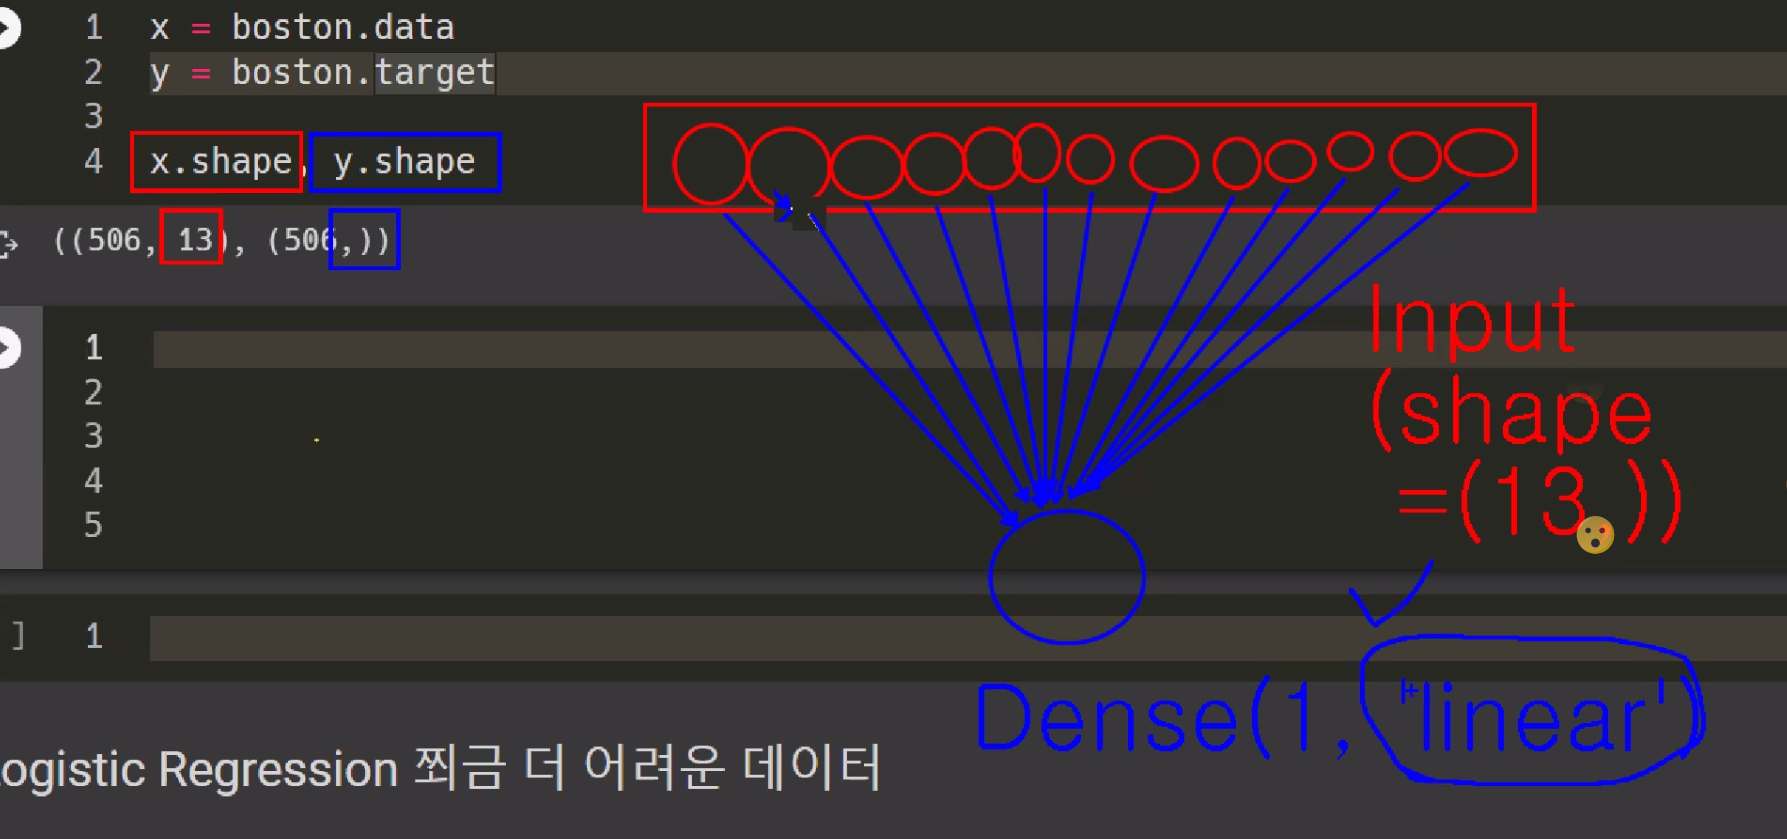

In [47]:
## 모델링 : Sequential API

# 1번. 세션 클리어 : 이전 모델이 남아 있다면 날려 줘!
keras.backend.clear_session()
# 2번. 모델 발판 생성 : 순차적으로 쌓을 발판!
model = keras.models.Sequential()

# 3번 : 모델 블록 조립 : .add()
model.add( keras.layers.Input(shape=(12,)))
model.add( keras.layers.Dense(1, activation='linear'))


# 4번 : 컴파일
model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam())

In [48]:
# 학습
model.fit(x, y, epochs=10, verbose=1)

print(y)
print(model.predict(x))

Epoch 1/10
16/16 [==============================] - 2s 4ms/step - loss: 55241.7852
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 51018.1914
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 46985.3203
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 43229.5625
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 39752.9648
Epoch 6/10
16/16 [==============================] - 0s 3ms/step - loss: 36381.3516
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 33378.3867
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 30486.4922
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 27851.0781
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 25345.7363
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 1

In [49]:
# 예측값 생성
y_pred = model.predict(x)

16/16 [==============================] - 0s 2ms/step


In [50]:
y_pred[:10].reshape(-1) # reshpae해서 차원을 축소시킴 >> 한줄로 봄

array([110.897514,  90.23833 ,  95.07765 ,  90.101295,  87.7339  ,
        87.45489 , 113.131905, 105.94778 ,  99.22958 , 108.45699 ],
      dtype=float32)

In [51]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## Logistic Regression 쬐금 더 어려운 데이터

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
cancer = load_breast_cancer()

In [38]:
x = cancer.data
y = cancer.target

# ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'> 해결
x = np.asarray(x)
y = np.asarray(y)

# 모양 확인해볼 것
x.shape, y.shape # x 30, y 1 입니당.

((569, 30), (569,))

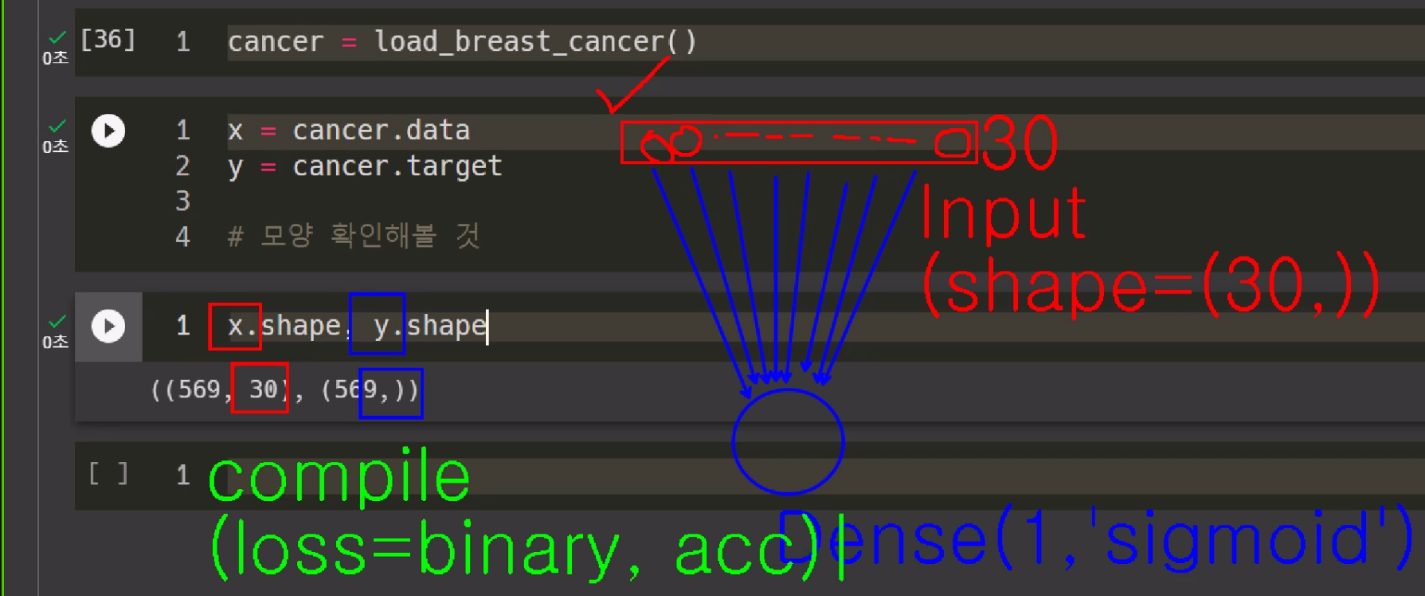

In [39]:
# 모델링 : Sequential API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 레이어 선언
model = keras.models.Sequential()
# 3. 레이어 블록 조립
model.add( keras.layers.Input(shape=(30,)))
model.add( keras.layers.Dense(1, activation='sigmoid'))

# 4. 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [40]:
model.fit(x, y, epochs=10, verbose=1)

Epoch 1/10
18/18 [==============================] - 3s 6ms/step - loss: 129.9516 - accuracy: 0.3726
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 115.7446 - accuracy: 0.3726
Epoch 3/10
18/18 [==============================] - 0s 10ms/step - loss: 101.4340 - accuracy: 0.3726
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 87.2171 - accuracy: 0.3726
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 72.9564 - accuracy: 0.3726
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 58.5653 - accuracy: 0.3726
Epoch 7/10
18/18 [==============================] - 0s 8ms/step - loss: 44.3110 - accuracy: 0.3726
Epoch 8/10
18/18 [==============================] - 0s 4ms/step - loss: 30.0990 - accuracy: 0.3743
Epoch 9/10
18/18 [==============================] - 0s 6ms/step - loss: 16.1476 - accuracy: 0.3814
Epoch 10/10
18/18 [==============================] - 0s 3ms/step - loss: 7.4489 - accuracy: 0.4815


In [41]:
# 예측값 생성
y_pred = model.predict(x)

18/18 [==============================] - 0s 3ms/step


In [42]:
y_pred[:5]

array([[1.00000000e+00],
       [6.43751941e-10],
       [1.02785055e-11],
       [1.00000000e+00],
       [4.76734956e-30]], dtype=float32)

In [43]:
y[:5]

array([0, 0, 0, 0, 0])